In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
import sqlite3 as sq

# Archive #2

#### Procedure for reading the data

We used SQLite to process the file.

In [29]:
conn = sq.connect('database_a2.sqlite')

#### Procedure for cleaning data

We decided to look at a few major tables and clean them by joining them on IDs from other tables. To keep track of which table needed which other table, we wrote out, then drew out the schema of the tables we wanted to work with:

#### Tables to Import

Player Model
- Player
- Batting Style
- Bowling_Style
- Country

Match Model
- Match
- Team
- Season

Venue Model
- Venue
- City


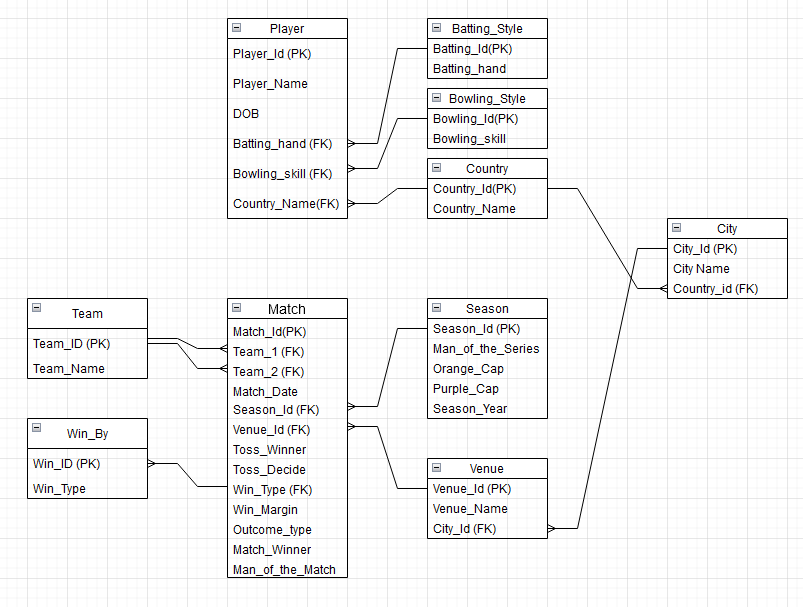

Then, we imported and merged the tables we needed: First, with Player and its related tables...

In [30]:
tables_import = ['Player', 'Batting_Style', 'Bowling_Style', 'Country']
for table in tables_import:
    exec(f'{table} = pd.read_sql_query(f"SELECT * from {table}", sq.connect("database_a2.sqlite"))')
Player = Player.rename(columns={'Country_Name': 'Country_Id', 'Batting_hand': 'Batting_Id', 'Bowling_skill': 'Bowling_Id'})

Run merge and drop cell only once, else run import above again

In [31]:
Player = pd.merge(Player, Country, how="left", left_on="Country_Id", right_on="Country_Id")
Player = pd.merge(Player, Batting_Style, how="left", left_on="Batting_Id", right_on="Batting_Id")
Player = pd.merge(Player, Bowling_Style, how="left", left_on="Bowling_Id", right_on="Bowling_Id")
Player = Player.drop(columns=['Batting_Id', 'Bowling_Id', 'Country_Id'])

In [33]:
Player.head(8)

,Player_Id,Player_Name,DOB,Country_Name,Batting_hand,Bowling_skill
0,1,SC Ganguly,1972-07-08 00:00:00,India,Left-hand bat,Right-arm medium
1,2,BB McCullum,1981-09-27 00:00:00,New Zealand,Right-hand bat,Right-arm medium
2,3,RT Ponting,1974-12-19 00:00:00,Australia,Right-hand bat,Right-arm medium
3,4,DJ Hussey,1977-07-15 00:00:00,Australia,Right-hand bat,Right-arm offbreak
4,5,Mohammad Hafeez,1980-10-17 00:00:00,Pakistan,Right-hand bat,Right-arm offbreak
5,6,R Dravid,1973-01-11 00:00:00,India,Right-hand bat,Right-arm offbreak
6,7,W Jaffer,1978-02-16 00:00:00,India,Right-hand bat,Right-arm offbreak
7,8,V Kohli,1988-11-05 00:00:00,India,Right-hand bat,Right-arm medium


Then, for Match and its related tables:

In [87]:
tables_import = ['Match', 'Team', 'Season','Venue', 'City', 'Win_By', 'Outcome']

for table in tables_import:
    exec(f'{table} = pd.read_sql_query(f"SELECT * from {table}", sq.connect("database_a2.sqlite"))')
Match

,Match_Id,Team_1,Team_2,Match_Date,Season_Id,Venue_Id,Toss_Winner,Toss_Decide,Win_Type,Win_Margin,Outcome_type,Match_Winner,Man_of_the_Match
0,335987,2,1,2008-04-18 00:00:00,1,1,2,1,1,140.0,1,1.0,2.0
1,335988,4,3,2008-04-19 00:00:00,1,2,3,2,1,33.0,1,3.0,19.0
2,335989,6,5,2008-04-19 00:00:00,1,3,5,2,2,9.0,1,6.0,90.0
3,335990,7,2,2008-04-20 00:00:00,1,4,7,2,2,5.0,1,2.0,11.0
4,335991,1,8,2008-04-20 00:00:00,1,5,8,2,2,5.0,1,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,981016,6,2,2016-05-22 00:00:00,9,27,2,1,2,6.0,1,2.0,8.0
573,981018,13,2,2016-05-24 00:00:00,9,1,2,1,2,4.0,1,2.0,110.0
574,981020,11,1,2016-05-25 00:00:00,9,3,1,1,1,22.0,1,11.0,163.0
575,981022,13,11,2016-05-27 00:00:00,9,3,11,1,2,4.0,1,11.0,187.0


In [88]:
Match = pd.merge(Match, Team, left_on='Team_1', right_on='Team_Id', how='left')
Match.rename(columns={'Team_Name': 'Team 1'}, inplace=True)

Match = pd.merge(Match, Team, left_on='Team_2', right_on='Team_Id', how='left')
Match.rename(columns={'Team_Name': 'Team 2'}, inplace=True)

Match = pd.merge(Match, Team, left_on='Toss_Winner', right_on='Team_Id', how = 'left')
Match.rename(columns={'Team_Name': 'Toss Winner'}, inplace=True)
Match = Match.drop(columns=['Team_Id_x', 'Team_Id_y', 'Team_Id'])

Match = pd.merge(Match, Team, left_on='Toss_Decide', right_on='Team_Id', how = 'left')
Match.rename(columns={'Team_Name': 'Toss Decider'}, inplace=True)

Match = pd.merge(Match, Team, left_on='Match_Winner', right_on='Team_Id', how = 'left')
Match.rename(columns={'Team_Name': 'Match Winner'}, inplace=True)

Match = pd.merge(Match, Venue, left_on='Venue_Id', right_on='Venue_Id', how='left')
Match = pd.merge(Match, Win_By, left_on='Win_Type', right_on='Win_Id', how='left')
Match = pd.merge(Match, Outcome, left_on='Outcome_type', right_on='Outcome_Id', how = 'left')

Match = Match[['Match_Id',
               'Team 1',
               'Team 2',
               'Match_Date',
               'Venue_Name', 'Toss_Winner', 'Toss_Decide', 'Win_Type_y', 'Win_Margin', 'Outcome_type', 'Match_Winner', 'Man_of_the_Match']]# 

,Match_Id,Team_1,Team_2,Match_Date,Season_Id,Venue_Id,Toss_Winner,Toss_Decide,Win_Type_x,Win_Margin,...,Team_Id_x,Toss Decider,Team_Id_y,Match Winner,Venue_Name,City_Id,Win_Id,Win_Type_y,Outcome_Id,Outcome_Type
0,335987,2,1,2008-04-18 00:00:00,1,1,2,1,1,140.0,...,1,Kolkata Knight Riders,1.0,Kolkata Knight Riders,M Chinnaswamy Stadium,1,1,runs,1,Result
1,335988,4,3,2008-04-19 00:00:00,1,2,3,2,1,33.0,...,2,Royal Challengers Bangalore,3.0,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",2,1,runs,1,Result
2,335989,6,5,2008-04-19 00:00:00,1,3,5,2,2,9.0,...,2,Royal Challengers Bangalore,6.0,Delhi Daredevils,Feroz Shah Kotla,3,2,wickets,1,Result
3,335990,7,2,2008-04-20 00:00:00,1,4,7,2,2,5.0,...,2,Royal Challengers Bangalore,2.0,Royal Challengers Bangalore,Wankhede Stadium,4,2,wickets,1,Result
4,335991,1,8,2008-04-20 00:00:00,1,5,8,2,2,5.0,...,2,Royal Challengers Bangalore,1.0,Kolkata Knight Riders,Eden Gardens,5,2,wickets,1,Result
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,981016,6,2,2016-05-22 00:00:00,9,27,2,1,2,6.0,...,1,Kolkata Knight Riders,2.0,Royal Challengers Bangalore,Shaheed Veer Narayan Singh International Stadium,25,2,wickets,1,Result
573,981018,13,2,2016-05-24 00:00:00,9,1,2,1,2,4.0,...,1,Kolkata Knight Riders,2.0,Royal Challengers Bangalore,M Chinnaswamy Stadium,1,2,wickets,1,Result
574,981020,11,1,2016-05-25 00:00:00,9,3,1,1,1,22.0,...,1,Kolkata Knight Riders,11.0,Sunrisers Hyderabad,Feroz Shah Kotla,3,1,runs,1,Result
575,981022,13,11,2016-05-27 00:00:00,9,3,11,1,2,4.0,...,1,Kolkata Knight Riders,11.0,Sunrisers Hyderabad,Feroz Shah Kotla,3,2,wickets,1,Result


In [89]:
Match.columns

Index(['Match_Id', 'Team_1', 'Team_2', 'Match_Date', 'Season_Id', 'Venue_Id',
       'Toss_Winner', 'Toss_Decide', 'Win_Type_x', 'Win_Margin',
       'Outcome_type', 'Match_Winner', 'Man_of_the_Match', 'Team 1', 'Team 2',
       'Toss Winner', 'Team_Id_x', 'Toss Decider', 'Team_Id_y', 'Match Winner',
       'Venue_Name', 'City_Id', 'Win_Id', 'Win_Type_y', 'Outcome_Id',
       'Outcome_Type'],
      dtype='object')

In [38]:
Match.columns

Index(['Match_Id', 'Team_1', 'Team_2', 'Match_Date', 'Season_Id', 'Venue_Id',
       'Toss_Winner', 'Toss_Decide', 'Win_Type', 'Win_Margin', 'Outcome_type',
       'Match_Winner', 'Man_of_the_Match'],
      dtype='object')

In [40]:
Match.head()

,Match_Id,Team_1,Team_2,Match_Date,Season_Id,Venue_Id,Toss_Winner,Toss_Decide,Win_Type,Win_Margin,Outcome_type,Match_Winner,Man_of_the_Match,Team_Id_x,Team_1_Name,Team_Id_y,Team_2_Name,Team_Id,Team_Name
0,335987,2,1,2008-04-18 00:00:00,1,1,2,1,1,140.0,1,1.0,2.0,2,Royal Challengers Bangalore,1,Kolkata Knight Riders,1,Kolkata Knight Riders
1,335988,4,3,2008-04-19 00:00:00,1,2,3,2,1,33.0,1,3.0,19.0,4,Kings XI Punjab,3,Chennai Super Kings,1,Kolkata Knight Riders
2,335989,6,5,2008-04-19 00:00:00,1,3,5,2,2,9.0,1,6.0,90.0,6,Delhi Daredevils,5,Rajasthan Royals,1,Kolkata Knight Riders
3,335990,7,2,2008-04-20 00:00:00,1,4,7,2,2,5.0,1,2.0,11.0,7,Mumbai Indians,2,Royal Challengers Bangalore,1,Kolkata Knight Riders
4,335991,1,8,2008-04-20 00:00:00,1,5,8,2,2,5.0,1,1.0,4.0,1,Kolkata Knight Riders,8,Deccan Chargers,1,Kolkata Knight Riders


Finally, Venue and its related tables:

Run merge and drop cell only once, else run import above again

In [49]:
Venue = pd.merge(Venue, City, how="left", left_on="City_Id", right_on="City_Id")
Venue = Venue.rename(columns={'Country_id': 'Country_Id'})
Venue = pd.merge(Venue, Country, how="left", left_on="Country_Id", right_on="Country_Id")
Venue = Venue.drop(columns=['City_Id', 'Country_Id'])

In [50]:
Venue

,Venue_Id,Venue_Name,City_Name,Country_Name
0,1,M Chinnaswamy Stadium,Bangalore,India
1,2,"Punjab Cricket Association Stadium, Mohali",Chandigarh,India
2,3,Feroz Shah Kotla,Delhi,India
3,4,Wankhede Stadium,Mumbai,India
4,5,Eden Gardens,Kolkata,India
5,6,Sawai Mansingh Stadium,Jaipur,India
6,7,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India
7,8,"MA Chidambaram Stadium, Chepauk",Chennai,India
8,9,Dr DY Patil Sports Academy,Mumbai,India
9,10,Newlands,Cape Town,South Africa


# Sample Queries

#### Player

In [43]:
pquery_one = Player.loc[(Player["Country_Name"] == "India") & (Player["Batting_hand"] == "Left-hand bat") & Player["Bowling_skill"].notna() ]
pquery_one

,Player_Id,Player_Name,DOB,Country_Name,Batting_hand,Bowling_skill
0,1,SC Ganguly,1972-07-08 00:00:00,India,Left-hand bat,Right-arm medium
15,16,SB Joshi,1970-06-06 00:00:00,India,Left-hand bat,Slow left-arm orthodox
20,21,SK Raina,1986-11-27 00:00:00,India,Left-hand bat,Right-arm offbreak
23,24,K Goel,1986-12-24 00:00:00,India,Left-hand bat,Right-arm offbreak
26,27,Yuvraj Singh,1981-12-12 00:00:00,India,Left-hand bat,Slow left-arm orthodox
28,29,IK Pathan,1984-10-27 00:00:00,India,Left-hand bat,Left-arm medium-fast
34,35,RA Jadeja,1988-12-06 00:00:00,India,Left-hand bat,Slow left-arm orthodox
39,40,G Gambhir,1981-10-14 00:00:00,India,Left-hand bat,Legbreak
41,42,S Dhawan,1985-12-05 00:00:00,India,Left-hand bat,Right-arm offbreak
47,48,AM Nayar,1983-10-08 00:00:00,India,Left-hand bat,Right-arm medium


In [56]:
pquery_two = Player.loc[(Player["Bowling_skill"] == "Legbreak") & (Player["Country_Name"] == "South Africa")]
pquery_two

,Player_Id,Player_Name,DOB,Country_Name,Batting_hand,Bowling_skill
291,292,CA Ingram,1985-07-03 00:00:00,South Africa,Left-hand bat,Legbreak
302,303,F du Plessis,1984-07-13 00:00:00,South Africa,Right-hand bat,Legbreak


#### Match

In [17]:
mquery_one = Match.loc[(Match["Win_Margin"] > 100) & ((Match['Team_1_Name'] == 'Royal Challengers Bangalore') | (Match['Team_2_Name'] == 'Royal Challengers Bangalore'))]
mquery_one

,Match_Id,Team_1_Name,Team_2_Name,Match_Date,Venue_Name,Toss_Winner,Toss_Decide,Win_Type_y,Win_Margin,Outcome_type,Match_Winner,Man_of_the_Match
0,335987,Royal Challengers Bangalore,Kolkata Knight Riders,2008-04-18 00:00:00,M Chinnaswamy Stadium,2,1,runs,140.0,1,1.0,2.0
236,501265,Kings XI Punjab,Royal Challengers Bangalore,2011-05-17 00:00:00,Himachal Pradesh Cricket Association Stadium,4,2,runs,111.0,1,4.0,53.0
351,598032,Royal Challengers Bangalore,Pune Warriors,2013-04-23 00:00:00,M Chinnaswamy Stadium,10,1,runs,130.0,1,2.0,162.0
497,829790,Royal Challengers Bangalore,Kings XI Punjab,2015-05-06 00:00:00,M Chinnaswamy Stadium,4,1,runs,138.0,1,2.0,162.0
560,980992,Royal Challengers Bangalore,Gujarat Lions,2016-05-14 00:00:00,M Chinnaswamy Stadium,13,1,runs,144.0,1,2.0,110.0


In [18]:
mquery_two = Match.loc[(Match["Win_Type_y"] == "runs") & ((Match["Team_1_Name"] == "Mumbai Indians") | (Match["Team_2_Name"] == "Mumbai Indians"))]
mquery_two

,Match_Id,Team_1_Name,Team_2_Name,Match_Date,Venue_Name,Toss_Winner,Toss_Decide,Win_Type_y,Win_Margin,Outcome_type,Match_Winner,Man_of_the_Match
7,335994,Chennai Super Kings,Mumbai Indians,2008-04-23 00:00:00,"MA Chidambaram Stadium, Chepauk",7,1,runs,6.0,1,3.0,18.0
9,335996,Kings XI Punjab,Mumbai Indians,2008-04-25 00:00:00,"Punjab Cricket Association Stadium, Mohali",7,1,runs,66.0,1,4.0,26.0
22,336009,Mumbai Indians,Delhi Daredevils,2008-05-04 00:00:00,Dr DY Patil Sports Academy,6,1,runs,29.0,1,7.0,49.0
42,336029,Deccan Chargers,Mumbai Indians,2008-05-18 00:00:00,"Rajiv Gandhi International Stadium, Uppal",8,1,runs,25.0,1,7.0,71.0
46,336033,Mumbai Indians,Kings XI Punjab,2008-05-21 00:00:00,Wankhede Stadium,7,1,runs,1.0,1,4.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
516,829828,Mumbai Indians,Chennai Super Kings,2015-05-24 00:00:00,Eden Gardens,3,1,runs,41.0,1,7.0,57.0
533,980938,Delhi Daredevils,Mumbai Indians,2016-04-23 00:00:00,Feroz Shah Kotla,7,1,runs,10.0,1,6.0,351.0
537,980946,Kings XI Punjab,Mumbai Indians,2016-04-25 00:00:00,"Punjab Cricket Association IS Bindra Stadium, ...",4,1,runs,25.0,1,7.0,17.0
553,980978,Mumbai Indians,Sunrisers Hyderabad,2016-05-08 00:00:00,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,7,1,runs,85.0,1,11.0,73.0


#### Venue

In [55]:
vquery_one = Venue.loc[(Venue['City_Name'] == 'Abu Dhabi')]
vquery_one

,Venue_Id,Venue_Name,City_Name,Country_Name
28,29,Sheikh Zayed Stadium,Abu Dhabi,U.A.E
29,30,Sharjah Cricket Stadium,Abu Dhabi,U.A.E
30,31,Dubai International Cricket Stadium,Abu Dhabi,U.A.E


In [53]:
vquery_two = Venue.loc[(Venue["Country_Name"] != "India")]
vquery_two

,Venue_Id,Venue_Name,City_Name,Country_Name
9,10,Newlands,Cape Town,South Africa
10,11,St George's Park,Port Elizabeth,South Africa
11,12,Kingsmead,Durban,South Africa
12,13,SuperSport Park,Centurion,South Africa
13,14,Buffalo Park,East London,South Africa
14,15,New Wanderers Stadium,Johannesburg,South Africa
15,16,De Beers Diamond Oval,Kimberley,South Africa
16,17,OUTsurance Oval,Bloemfontein,South Africa
28,29,Sheikh Zayed Stadium,Abu Dhabi,U.A.E
29,30,Sharjah Cricket Stadium,Abu Dhabi,U.A.E
